# **EDA--->**

## *import libraries---:>*

In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Step 1: understand the data

### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

#### import CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("cardata.csv",index_col=[0])

#### *1. data preview*

In [6]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### *2 .data size*

In [8]:
df.shape

(15411, 13)

### *3. data type*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


### *4. descriptive summary*

In [3]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


### *Numerical and categorical data*

In [3]:
numerical_data = df.select_dtypes(include=["number"]).columns
categorical_data =df.select_dtypes(include=["object","category"]).columns

print(numerical_data)
print(categorical_data)                   


Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')
Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')


### check null value

In [53]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

### *skewness in data*

In [18]:
df[numerical_data].skew()

vehicle_age       0.833712
km_driven        28.172711
mileage           0.104961
engine            1.666467
max_power         2.485129
seats             2.039983
selling_price    10.047048
dtype: float64

- **Vehicle Age**: Slightly positively skewed (0.83)
- **KM Driven**: Highly positively skewed (28.17)
- **Mileage**: Slightly positively skewed (0.10)
- **Engine**: Slightly positively skewed (1.67)
- **Max Power**: Strongly positively skewed (2.49)
- **Seats**: Slightly positively skewed (2.04)
- **Selling Price**: Strongly positively skewed (10.05)


## Univariate graphical analysis

### Numerical features

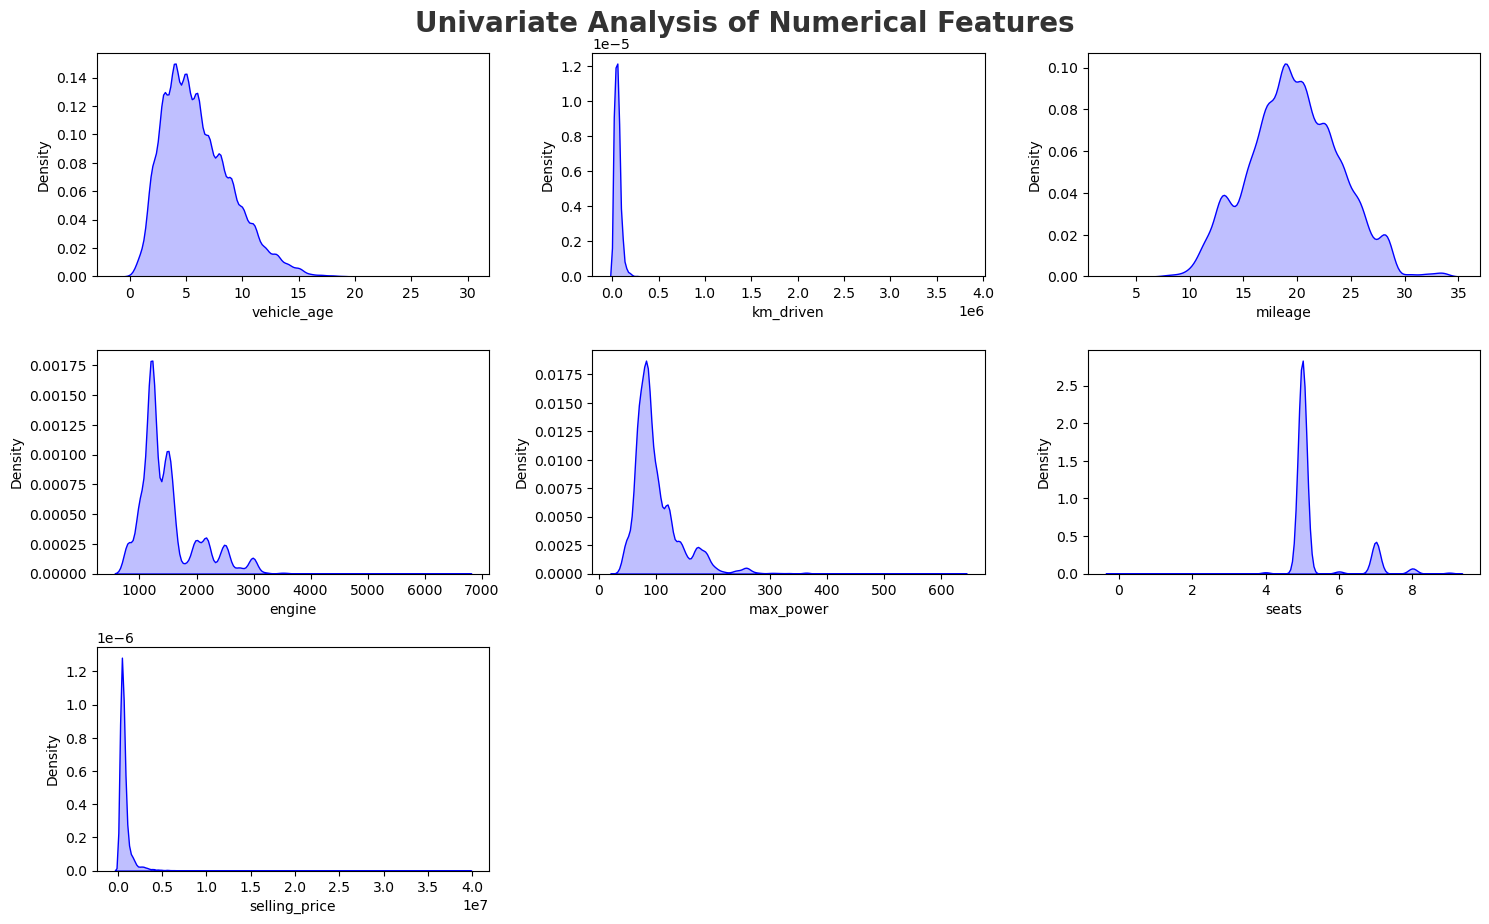

In [27]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8)

for i in range(0, len(numerical_data)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_data[i]],shade=True, color='b')
    plt.xlabel(numerical_data[i])
    plt.tight_layout()
    
# save plot
plt.savefig('Univariate_Num.png')

**Report**
* Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
* Outliers in km_driven, enginer, selling_price, and max power.

### Categorical feature

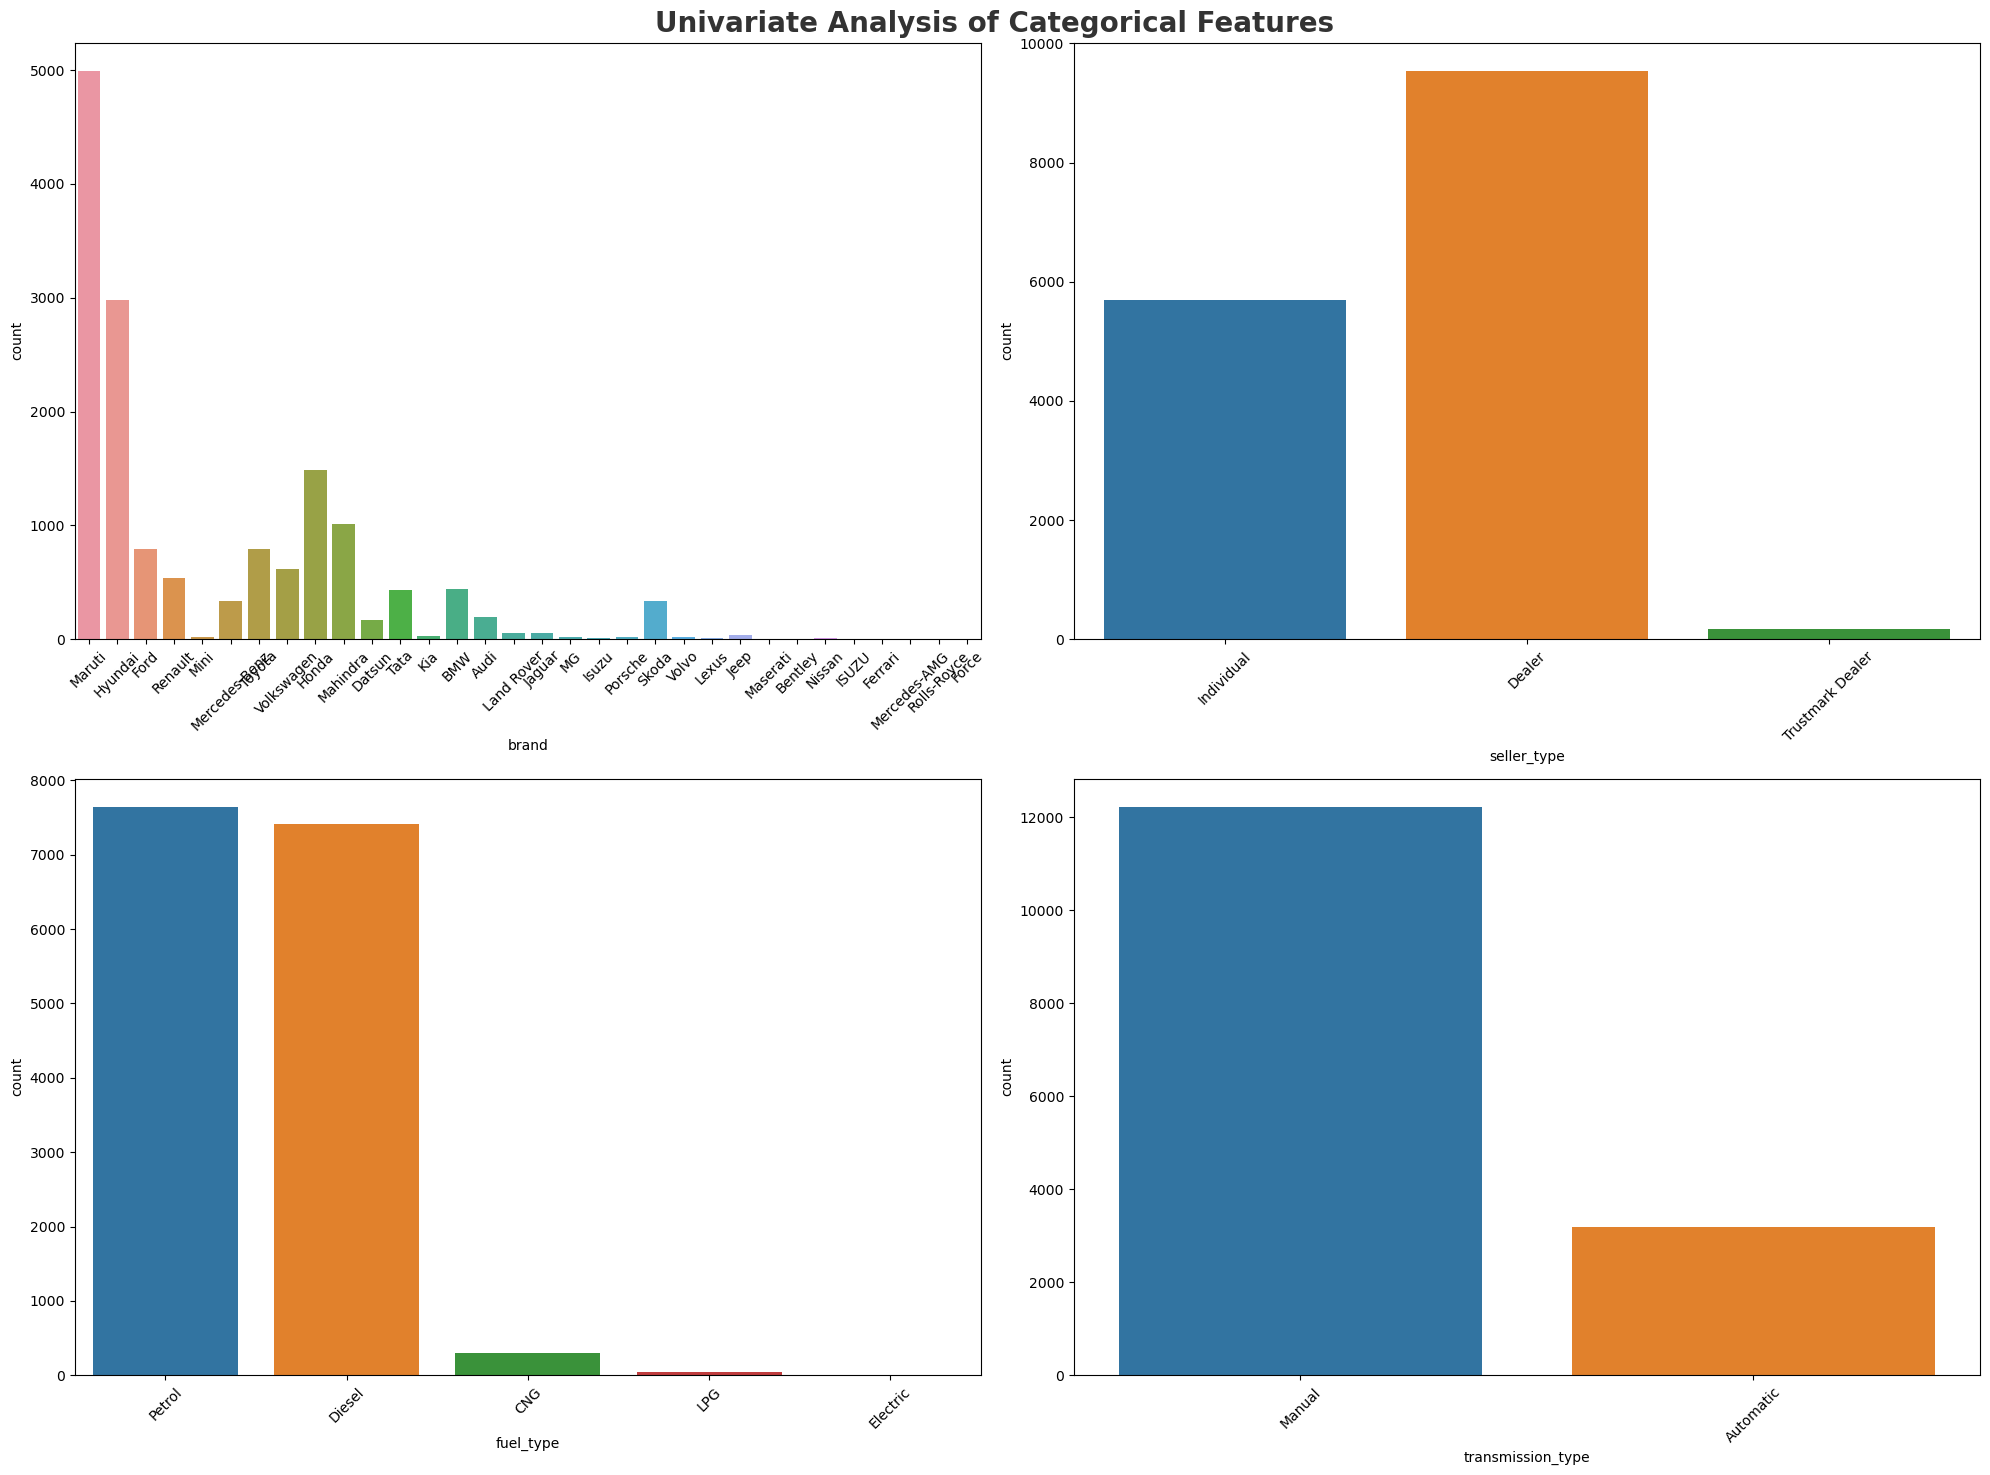

In [36]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    
# save plot
plt.savefig('Univariate_Categorcal.png')

## Report:
#### *Maruti Brand sold most*
#### *Dealer has sold most of the car*
#### *petrol and diesel sold most and electric car least sold*
#### *Manual car sold most*

### **Multivariate Analysis**

### mulicollinearity for Numerical feature

In [40]:
df.corr(numeric_only=True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

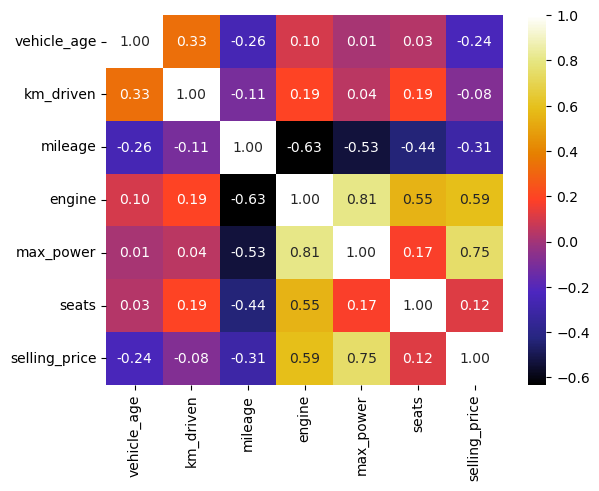

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="CMRmap")

**Report** 
* Our target column Selling Price has a weak positive correlation on engine  and little strong correlation with max_power.


### mulicollinearity for categorical feature

### *by using chi-square test :-show relationship b/w two categorical variables*
### **we test the relationship b/w categorical column and target(selling price)**

In [50]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_data:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_data, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


**Report** 
* Here all are  to Rejects Null Hypothesis which means it doesn't correlate with target column.*

In [4]:
continues_features=[feature for feature in numerical_data if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


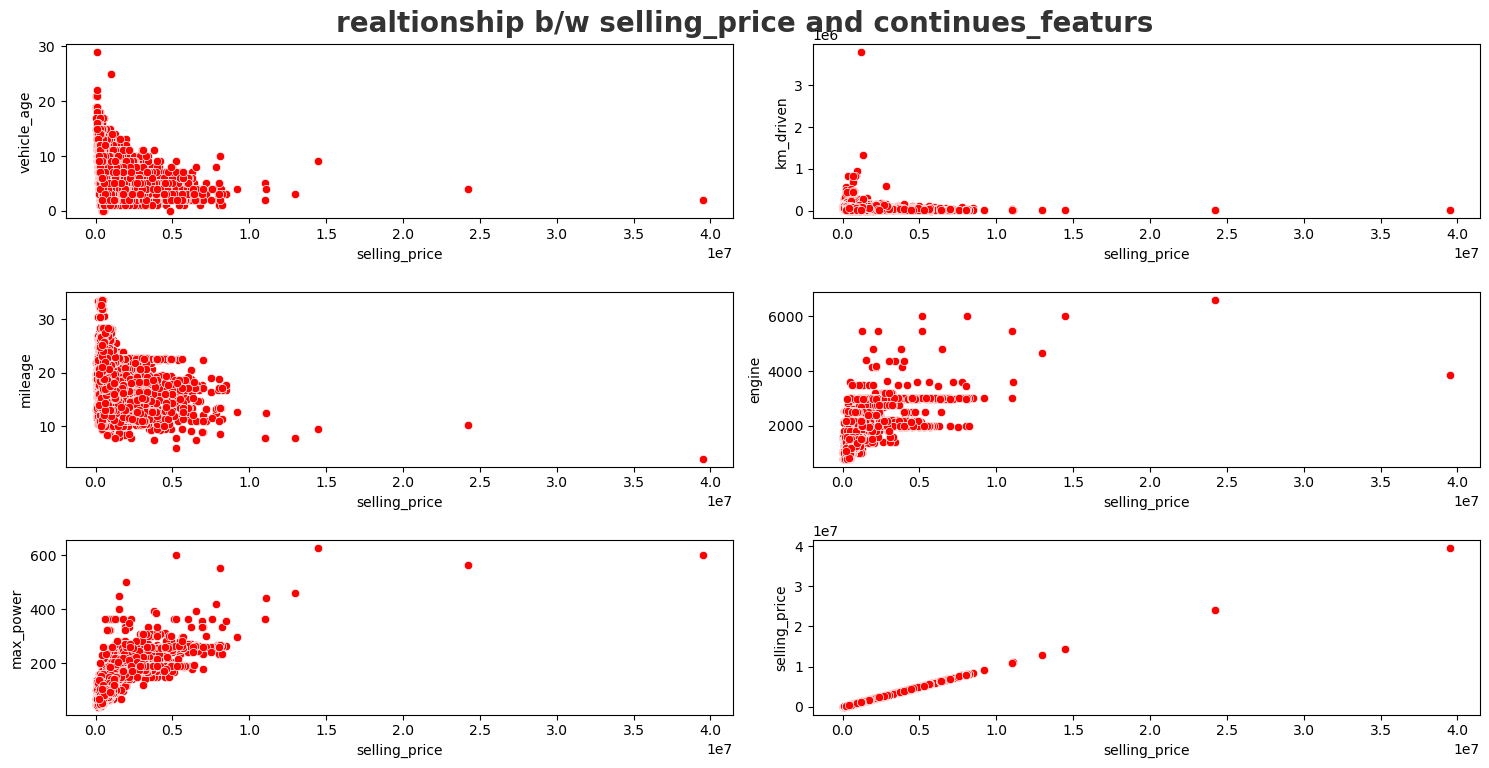

In [71]:
fig = plt.figure(figsize=(15,20))
for i in range(0,len(continues_features)):
    ax=plt.subplot(8,2,i+1)
    sns.scatterplot(data=df,x="selling_price", y=continues_features[i],color="r")
    plt.suptitle("realtionship b/w selling_price and continues_featurs",fontsize=20, fontweight='bold', alpha=0.8)
    plt.tight_layout()
    plt.savefig("target_vs_continues.png")
                 
                 

## report:
#### ->lower vehical age has more selling price as compared to high vehical age
#### ->upto 2500 cc engine has more selling price
#### -> under 1000km has more selling price
#### -> upto 400BHP has more selling price


#### most sold car and least sold car

In [73]:
df.car_name.value_counts()

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

In [77]:
df.car_name.value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [76]:
df.car_name.value_counts()[-1:-10:-1]

car_name
Force Gurkha             1
Hyundai Aura             1
Ferrari GTC4Lusso        1
Tata Altroz              1
Mercedes-AMG C           1
Maserati Ghibli          1
Rolls-Royce Ghost        1
Maserati Quattroporte    1
Isuzu MUX                1
Name: count, dtype: int64

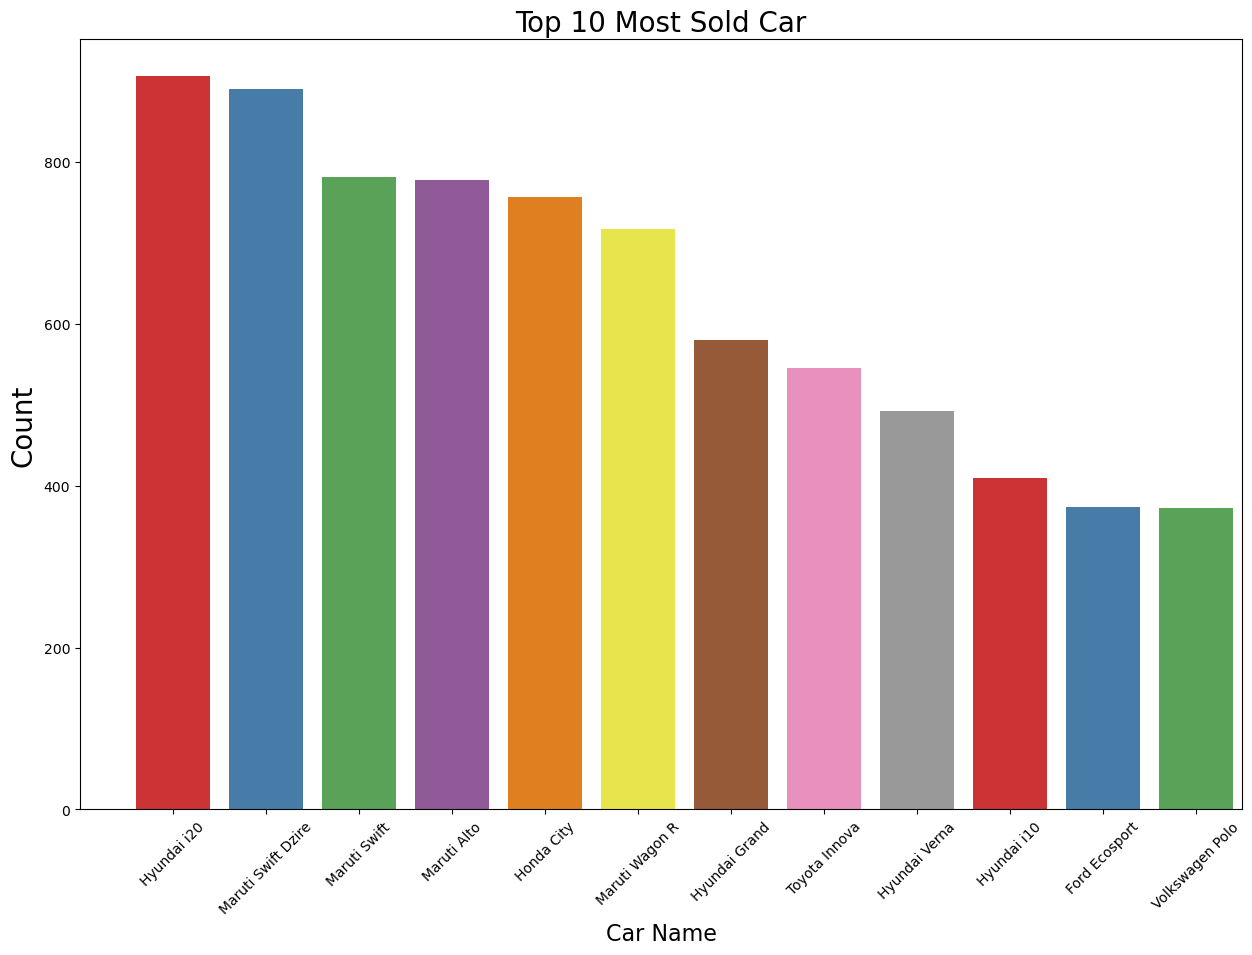

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(15,10))
sns.countplot(x="car_name",data=df,palette="Set1",order=df["car_name"].value_counts().index)
plt.title("Top 10 Most Sold Car",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Car Name", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,11.5)
plt.show()
plt.savefig("Top 10 most sold car.png")    

### average price of most sold car

In [96]:

i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
i20

543603.7527593819

## Report:- average selling price of most sold car is 5.4lakh

## Most sold Brand

In [86]:
df.brand.value_counts()[0:10]

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

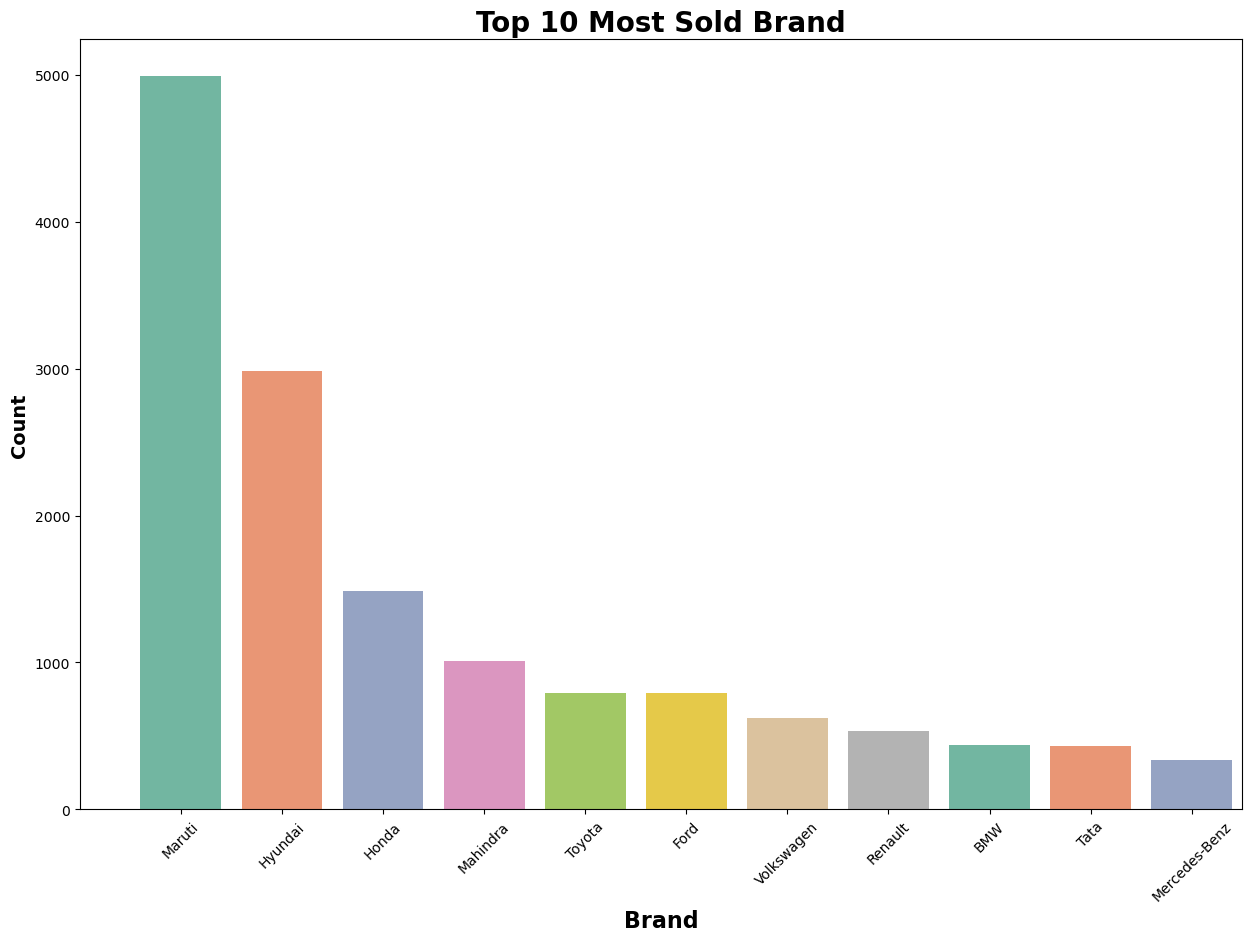

<Figure size 640x480 with 0 Axes>

In [90]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x="brand",palette="Set2",order=df["brand"].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()
plt.savefig("Top 10 Most Sold Brand.png")

In [99]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
maruti

487089.3179086539

### Report :- average price of most sold brand is 4.8lakh

## Costliest Brand and costliest Car

In [6]:
brand = df.groupby("brand").selling_price.max()
brand_df = brand.to_frame().sort_values("selling_price",ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


In [16]:
df["brand"].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [17]:
df["brand"].nunique()

32

In [18]:
brand.index

Index(['Audi', 'BMW', 'Bentley', 'Datsun', 'Ferrari', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'MG', 'Mahindra', 'Maruti', 'Maserati', 'Mercedes-AMG',
       'Mercedes-Benz', 'Mini', 'Nissan', 'Porsche', 'Renault', 'Rolls-Royce',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='brand')

In [19]:
brand.values

array([ 6800000,  8500000, 14500000,   650000, 39500000,   700000,
        3200000,  3200000,  2600000,  1900000,  2300000,  6300000,
        5600000,  3525000,  9200000,  8000000,  2075000,  2950000,
        1225000,  6200000,  5100000, 13000000,  3875000,  1450000,
       11100000,  1155000, 24200000,  3550000,  1750000,  3650000,
        1250000,  8195000], dtype=int64)

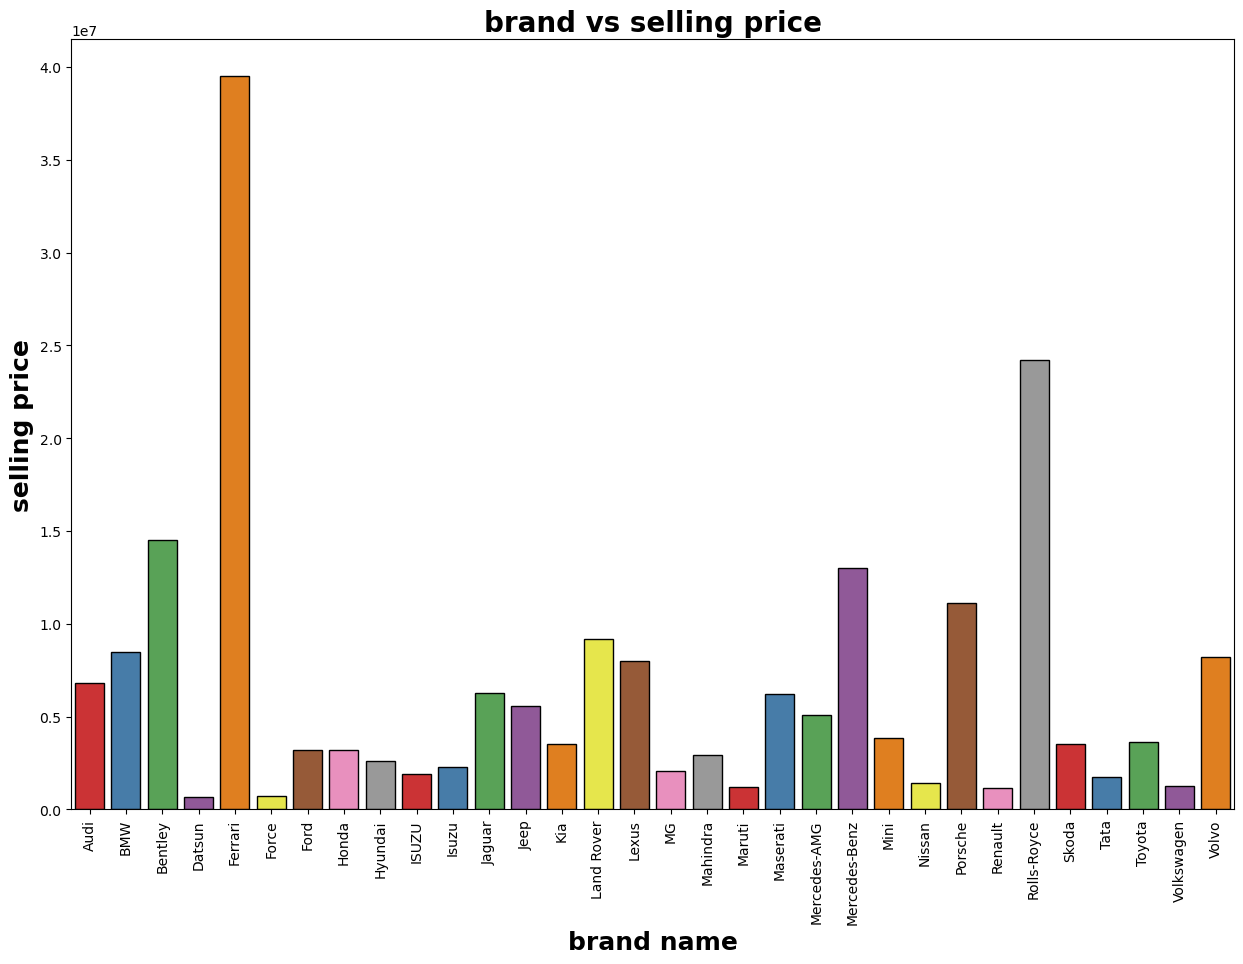

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x=brand.index,y=brand.values,palette="Set1",ec="black")
plt.title("brand vs selling price",weight="bold",fontsize=20)
plt.xlabel("brand name",weight="bold",fontsize=18)
plt.ylabel("selling price",weight="bold",fontsize=18)
plt.xticks(rotation=90)
plt.show()
plt.savefig("brand vs selling price.png")

In [25]:
car = df.groupby("car_name").selling_price.max()
car_df = car.to_frame().sort_values("selling_price",ascending=False)[0:5]
car_df

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000


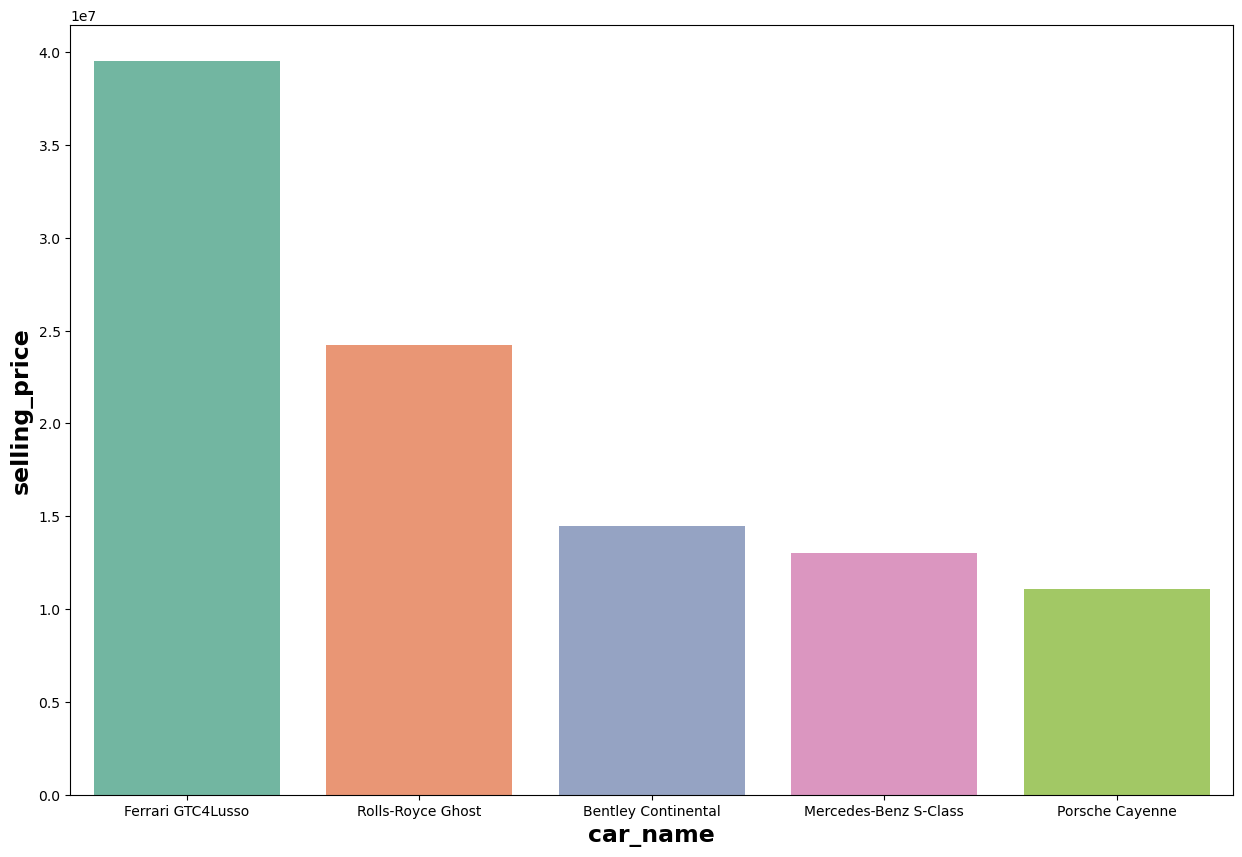

In [29]:
plt.figure(figsize=(15,10))
plt.xlabel("car_name" , weight="bold" , fontsize=17)
plt.ylabel("selling_price" , weight="bold",fontsize=17)
sns.barplot(x=car_df.index , y=car_df.selling_price,palette="Set2")
plt.show()

## Report:-
#### Ferrari GTC4Lusso is most sold car
#### Ferrari is most sold brand

### Mileage of car and brand:-

In [41]:
mileage_car=df.groupby("car_name")["mileage"].median().sort_values(ascending=False)[0:10]
mileage_car.to_frame()


,mileage
car_name,
Maruti Ciaz,26.21
Ford Aspire,25.83
Honda WR-V,25.50
Mahindra KUV100,25.32
Maruti Vitara,24.30
Renault KWID,24.04
Tata Tiago,23.84
Maruti Dzire LXI,23.26
Maruti Dzire VXI,23.26


In [38]:
mileage_brand=df.groupby("brand")["mileage"].median().sort_values(ascending=False)[0:10]
mileage_brand.to_frame()

,mileage
brand,
Renault,23.01
Lexus,22.37
Maruti,21.79
Datsun,20.67
Tata,20.30
Ford,20.00
Maserati,19.82
Hyundai,18.90
Volkswagen,18.78


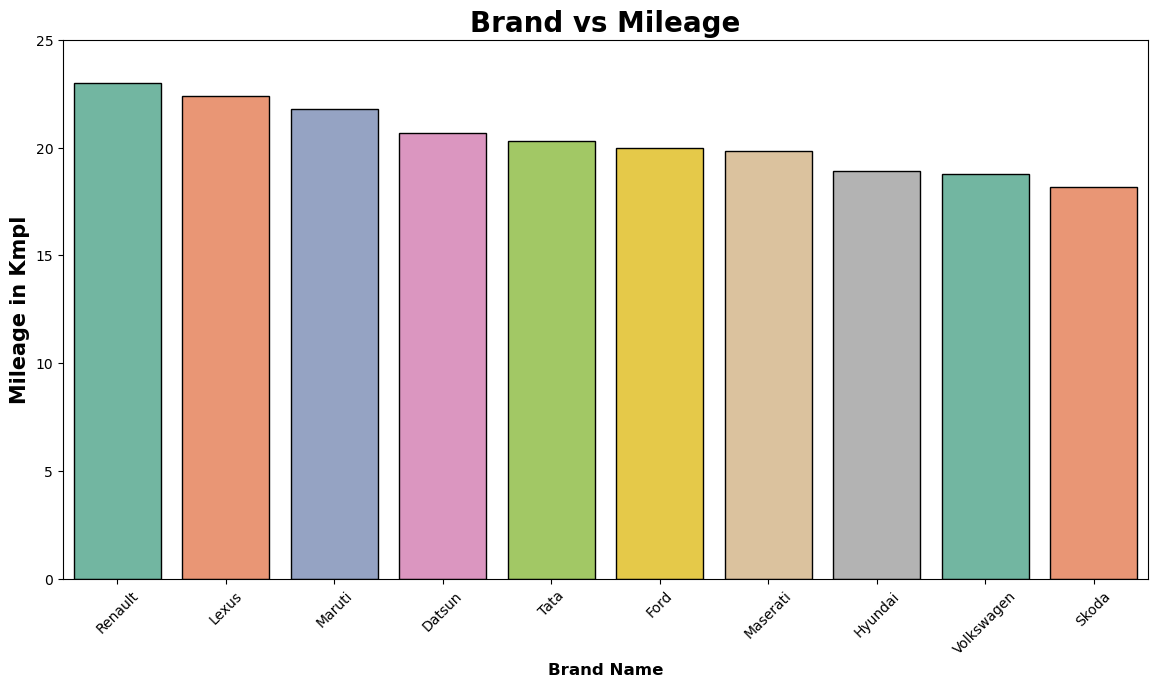

In [39]:
plt.figure(figsize=(14,7))
sns.barplot(x=mileage_brand.index, y=mileage_brand.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

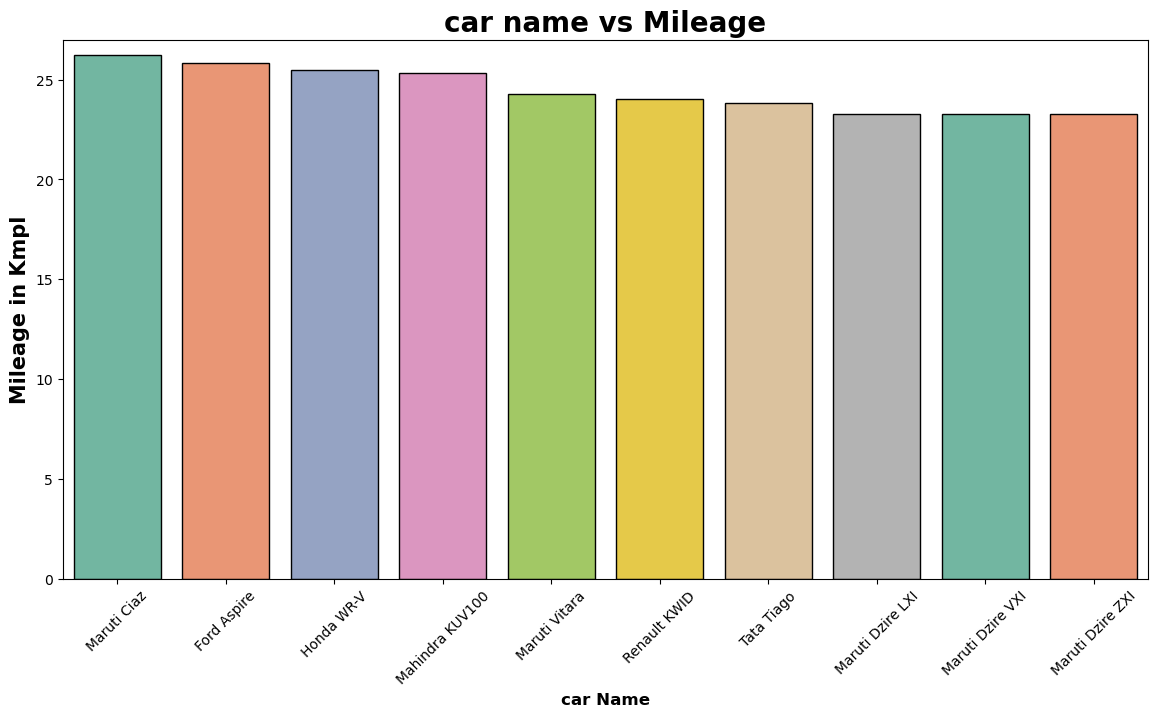

In [44]:
plt.figure(figsize=(14,7))
sns.barplot(x=mileage_car.index, y=mileage_car.values, ec = "black", palette="Set2")
plt.title("car name vs Mileage", weight="bold",fontsize=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

### Report:-
#### Renault(Brande) has high mileage among all the brands
#### Maruti ciaz (car_name) has high mileage among all the cars

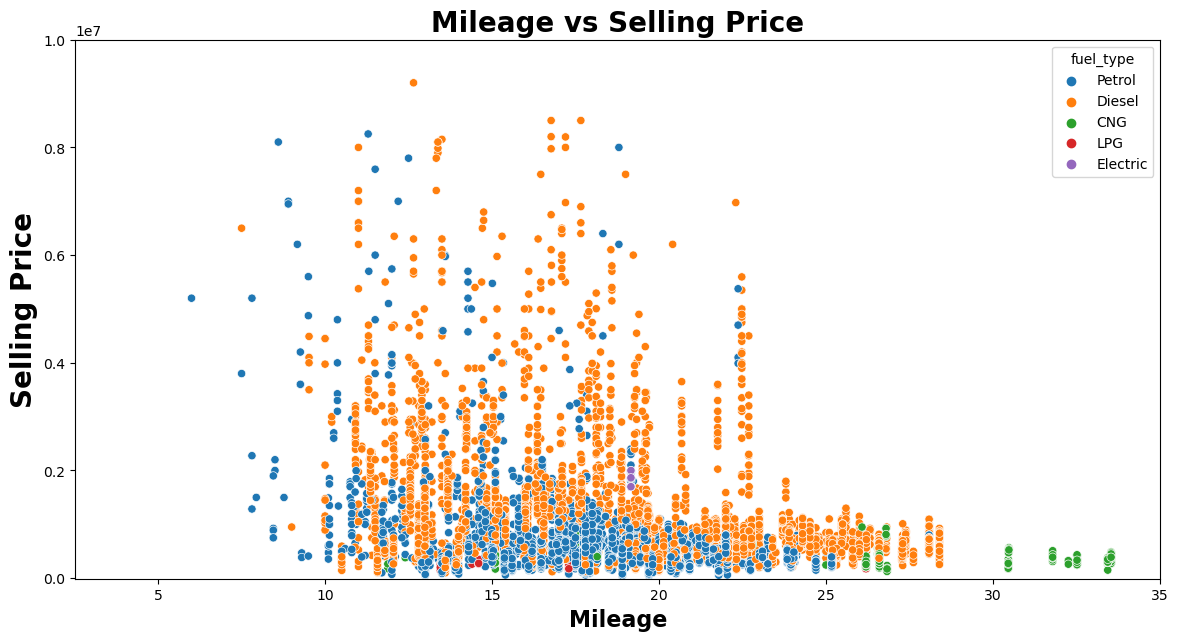

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()
plt.savefig("mileage vs selling price.png")

# Final Report:-
* The datatypes and Column names were right and there was 15411 rows and 13 columns
* The `selling_price` column is the target to predict. i.e Regression Problem.
* There are outliers in the `km_driven`, `engine`, `selling_price`, and `max power`.
* Dealers are the highest sellers of the used cars.
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold 
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
* We just need less data cleaning for this dataset.